In [432]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context('talk')
%matplotlib inline

from helpers import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [500]:
# parameterize this into a general purpose file mover renamer etc? or just learn bash?
## softmax classifier 0 -> softmax classifier 1 (vgg_lenet, vgg_mp_sc_16)
from shutil import copyfile, move

# sortd = 'betasoftmax'
# sortd = 'reversebetasoftmax'
sortd = 'random'

for i in range(0,6):
#     mani_dirs = [
#         '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_{}/'.format(i,j,sortd)
#     for j in range(11,13)]
    mani_dirs = [
        '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}f-formatted_features-sort_{}/'.format(i,j,sortd)
    for j in [1,4,8,13]]
    for md in mani_dirs:
        files = os.listdir(md)
        Softmaxes = [p for p in files if match_strings(['classifier_0_Softmax('], p)]
        template = files[0]

        for og_file in Softmaxes:
            og_file_path = os.path.join(md, og_file)
            print(og_file_path)
            dest = og_file.replace('classifier_0', 'classifier_1')
            dest = os.path.join(md, dest)
    #             print(dest)
            copyfile(og_file_path, dest)
            os.remove(og_file_path)

In [501]:
# parameterize this into a general purpose file mover renamer etc? or just learn bash?
## softmax classifier 0 -> softmax classifier 1 (vgg_lenet, vgg_mp_sc_16)
from shutil import copyfile, move

# sortd = 'betasoftmax'
# sortd = 'reversebetasoftmax'
sortd = 'random'

for i in range(0,6):
#     mani_dirs = [
#         '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_{}/'.format(i,j,sortd)
#     for j in range(11,13)]
    mani_dirs = [
        '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}f-formatted_features-sort_{}/'.format(i,j,sortd)
    for j in [1,4,8,13]]
    for md in mani_dirs:
        files = os.listdir(md)
        Softmaxes = [p for p in files if match_strings(['classifier_4_Softmax('], p)]
        template = files[0]

        for og_file in Softmaxes:
            og_file_path = os.path.join(md, og_file)
            print(og_file_path)
            dest = og_file.replace('classifier_4', 'classifier_5')
            dest = os.path.join(md, dest)
    #             print(dest)
            copyfile(og_file_path, dest)
            os.remove(og_file_path)

../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_8-acc_52.34-classifier_4_Softmax(in_features=512,_out_features=50,_bias=True)-featnum_50-.h5
../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_0-acc_0.00-classifier_4_Softmax(in_features=512,_out_features=50,_bias=True)-featnum_50-.h5
../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_4-acc_48.44-classifier_4_Softmax(in_features=512,_out_features=50,_bias=True)-featnum_50-.h5
../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_16-acc_67.97-classifier_4_Softmax(in_features=512,_out_features=50,_bias=True)-featnum_50-.h5
../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_50-acc_8

### VGG1-s training loss

visual network final performance!

In [146]:
LOG_DIR = '../dump/exp_transfer2/logs/'
logs = os.listdir(LOG_DIR)

net_archs = np.unique([catch(log, 'arch') for log in logs]) # vgg1f is vgg1-s, should rename..

log  final loss  \
0  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...    61.90800   
1  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...    65.01568   
2  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    34.51200   
3  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    12.76562   
4  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    33.42000   

                                           full loss  arch  seed imageset  
0  [99.0, 79.36, 78.44, 74.08, 76.32, 79.7, 73.08...  vgg1     2      val  
1  [99.0, 84.1406, 79.2969, 78.5937, 76.7187, 76....  vgg1     2    train  
2  [99.0, 83.76, 72.62, 64.86, 62.2, 57.48, 57.64...  vgg7     5      val  
3  [99.0, 91.25, 78.04679999999999, 69.6092, 64.7...  vgg7     5    train  
4  [99.0, 76.6, 64.62, 58.46, 55.0, 54.16, 50.2, ...  vgg5     5      val

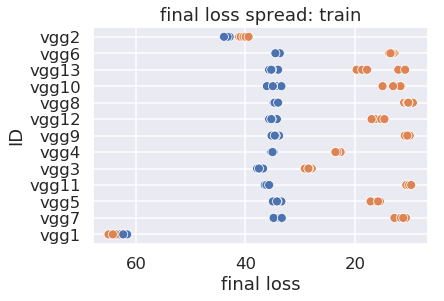

In [147]:
logs_final = []
for log in logs:
    losses = get_losses(LOG_DIR+log, epochs=50)
    losses = np.array([np.insert(losses[1],0,99),np.insert(losses[0],0,99)])
    logs_final.append([log+'-final-imageset_val', np.mean(losses[0][45:-1]), losses[0]])
    logs_final.append([log+'-final-imageset_train', np.mean(losses[1][45:-1]), losses[1]])
    
    
log_df = pd.DataFrame(columns=["log", "final loss", "full loss"], data=logs_final)
log_df['arch'] = log_df['log'].apply(lambda x : str(catch(x, 'arch')))
log_df['seed'] = log_df['log'].apply(lambda x : int(catch(x, 'seed')))
log_df['imageset'] = log_df['log'].apply(lambda x : catch(x, 'imageset'))

ax = sns.scatterplot(x='final loss',y='arch', hue='imageset', legend=False, data=log_df)
ax.invert_xaxis()
ax.set_title('final loss spread: train')
ax.set_ylabel('ID')

log_df.head()

log  final loss  \
0  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...    61.90800   
1  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...    65.01568   
2  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    34.51200   
3  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    12.76562   
4  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    33.42000   

                                           full loss  arch  seed imageset  
0  [99.0, 79.36, 78.44, 74.08, 76.32, 79.7, 73.08...  vgg1     2      val  
1  [99.0, 84.1406, 79.2969, 78.5937, 76.7187, 76....  vgg1     2    train  
2  [99.0, 83.76, 72.62, 64.86, 62.2, 57.48, 57.64...  vgg7     5      val  
3  [99.0, 91.25, 78.04679999999999, 69.6092, 64.7...  vgg7     5    train  
4  [99.0, 76.6, 64.62, 58.46, 55.0, 54.16, 50.2, ...  vgg5     5      val

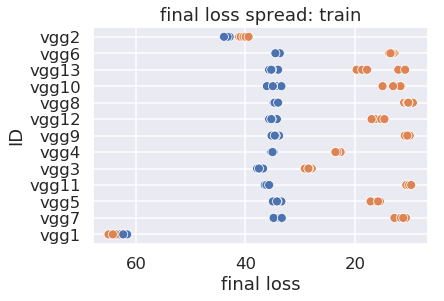

In [148]:
LOG_DIR = '../dump/exp_transfer2/logs/'
logs = os.listdir(LOG_DIR)

net_archs = np.unique([catch(log, 'arch') for log in logs]) # vgg1f is vgg1-s, should rename..

logs_final = []
for log in logs:
    losses = get_losses(LOG_DIR+log, epochs=50)
    losses = np.array([np.insert(losses[1],0,99),np.insert(losses[0],0,99)])
    logs_final.append([log+'-final-imageset_val', np.mean(losses[0][45:-1]), losses[0]])
    logs_final.append([log+'-final-imageset_train', np.mean(losses[1][45:-1]), losses[1]])
    
    
log_df = pd.DataFrame(columns=["log", "final loss", "full loss"], data=logs_final)
log_df['arch'] = log_df['log'].apply(lambda x : str(catch(x, 'arch')))
log_df['seed'] = log_df['log'].apply(lambda x : int(catch(x, 'seed')))
log_df['imageset'] = log_df['log'].apply(lambda x : catch(x, 'imageset'))

ax = sns.scatterplot(x='final loss',y='arch', hue='imageset', legend=False, data=log_df)
ax.invert_xaxis()
ax.set_title('final loss spread: train')
ax.set_ylabel('ID')

log_df.head()

In [158]:
100-36.520

63.48

In [213]:
log_df[(log_df['arch']=='vgg1')&(log_df['seed']==5)]
log_df[(log_df['arch']=='vgg1')&(log_df['seed']==5)&(log_df['imageset']=='val')]['full loss'].values
# log_df[(log_df['arch']=='vgg1')]

array([array([99.  , 80.64, 80.04, 77.2 , 75.5 , 75.  , 74.08, 73.78, 80.  ,
       75.58, 79.3 , 73.9 , 75.46, 73.04, 75.06, 68.56, 77.92, 72.7 ,
       76.06, 73.14, 73.36, 70.8 , 73.02, 74.82, 72.46, 69.7 , 76.78,
       76.38, 75.66, 72.7 , 72.76, 67.66, 68.02, 66.38, 64.84, 65.38,
       64.9 , 65.26, 65.26, 65.8 , 63.72, 63.44, 63.92, 64.44, 63.12,
       61.62, 63.24, 62.44, 63.76, 61.78, 62.98])], dtype=object)

In [214]:
log_df[(log_df['arch']=='vgg1')&(log_df['seed']==5)&(log_df['imageset']=='val')]['full loss'].values

array([array([99.  , 80.64, 80.04, 77.2 , 75.5 , 75.  , 74.08, 73.78, 80.  ,
       75.58, 79.3 , 73.9 , 75.46, 73.04, 75.06, 68.56, 77.92, 72.7 ,
       76.06, 73.14, 73.36, 70.8 , 73.02, 74.82, 72.46, 69.7 , 76.78,
       76.38, 75.66, 72.7 , 72.76, 67.66, 68.02, 66.38, 64.84, 65.38,
       64.9 , 65.26, 65.26, 65.8 , 63.72, 63.44, 63.92, 64.44, 63.12,
       61.62, 63.24, 62.44, 63.76, 61.78, 62.98])], dtype=object)

(155, 3, 51)

In [237]:
for f in loss.transpose(1,0,2).reshape(3,-1).T:
    print(f)

['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '0' '99.0']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '1' '79.36']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '2' '78.44']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '3' '74.08']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '4' '76.32']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '5' '79.7']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '6' '73.08']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '7' '73.74']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '8' '73.53999999999999']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val'
 '9' '73.02']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-images

['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '22' '38.12489999999999']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '23' '37.9687']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '24' '37.8125']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '25' '36.71870000000001']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '26' '38.124900000000004']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '27' '37.265699999999995']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '28' '38.671800000000005']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '29' '38.59380000000001']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-imageset_train'
 '30' '37.5']
['seed_3-drop_0-dataset_CIFAR100-classes_50-arch_vgg4-log-final-ima

['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '21' '35.3905']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '22' '33.281300000000016']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '23' '31.171900000000008']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '24' '32.890699999999995']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '25' '30.859499999999997']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '26' '31.484300000000005']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '27' '29.296900000000008']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '28' '29.296900000000008']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg9-log-final-imageset_train'
 '29' '27.968900000000005']
['seed_2-drop_0-dataset_CIFAR100-classe

 '8' '44.14059999999999']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '9' '45.1562']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '10' '46.7186']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '11' '44.375']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '12' '43.82829999999999']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '13' '37.0311']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '14' '39.375000000000014']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '15' '37.7341']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '16' '40.23440000000001']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset_train'
 '17' '37.8907']
['seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg5-log-final-imageset

['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '25' '43.56']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '26' '44.3']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '27' '42.52']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '28' '41.58']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '29' '43.24']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '30' '44.34']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '31' '35.540000000000006']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '32' '36.42']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '33' '35.14']
['seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg12-log-final-imageset_val'
 '34' '34.400000000000006']
['seed_1-drop_0-dataset_CIFAR100-cl

possible issue, logs of varying lengths!
('log:', 'seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val')


log  epoch   loss  arch  \
0  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      0  99.00  vgg1   
1  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      1  79.36  vgg1   
2  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      2  78.44  vgg1   
3  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      3  74.08  vgg1   
4  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      4  76.32  vgg1   

   seed imageset  
0     2      val  
1     2      val  
2     2      val  
3     2      val  
4     2      val

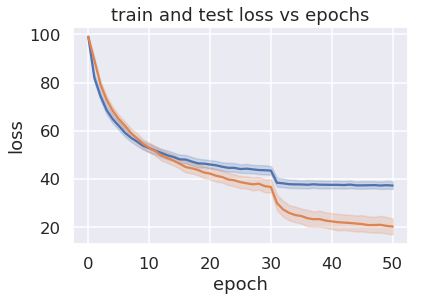

In [243]:
loss = []
for v in logs_final:
    if len(v[-1]) == len(logs_final[0][-1]):
        loss.append([np.tile(v[0], len(v[-1])), np.arange(len(v[-1])).astype(str), np.array(v[-1]).astype(str)])
    else:
        print('possible issue, logs of varying lengths!')
        print('log:', v[0])
    
loss = np.array(loss)
loss = loss.transpose(1,0,2).reshape(3,-1).T

loss_df = pd.DataFrame(columns=["log", "epoch", "loss"], data=loss)

loss_df['arch'] = loss_df['log'].apply(lambda x : str(catch(x, 'arch')))
loss_df['seed'] = loss_df['log'].apply(lambda x : catch(x, 'seed'))
loss_df['imageset'] = loss_df['log'].apply(lambda x : catch(x, 'imageset'))
loss_df['loss'] = pd.to_numeric(loss_df['loss'], errors='coerce')
loss_df['epoch'] = pd.to_numeric(loss_df['epoch'], errors='coerce')
loss_df['seed'] = pd.to_numeric(loss_df['seed'], errors='coerce')

ax = sns.lineplot(x='epoch',y='loss', hue='imageset', legend=False, data=loss_df)
ax.set_title('train and test loss vs epochs')
ax.set_ylabel('loss')


loss_df.head()

In [248]:
df['loss'] = df.apply(lambda x : loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']==x['imageset'])]['loss'].values[0], axis=1)

df['trainacc'] = df.apply(lambda x : 100-loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']=='train')]['loss'].values[0], axis=1)

df['valacc'] = df.apply(lambda x : 100-loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']=='val')]['loss'].values[0], axis=1)

### VGG1 measures

In [270]:
def add_loss(df, loss_df):
    df['loss'] = df.apply(lambda x : loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']==x['imageset'])]['loss'].values[0], axis=1)

    df['trainacc'] = df.apply(lambda x : 100-loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']=='train')]['loss'].values[0], axis=1)

    df['valacc'] = df.apply(lambda x : 100-loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']=='val')]['loss'].values[0], axis=1)
    
    return df

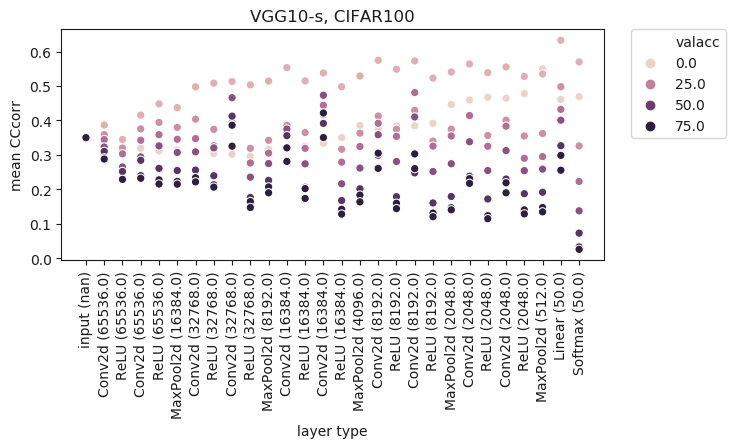

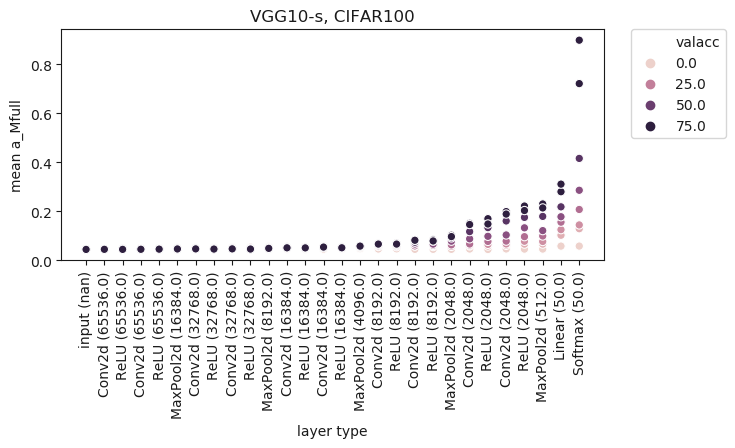

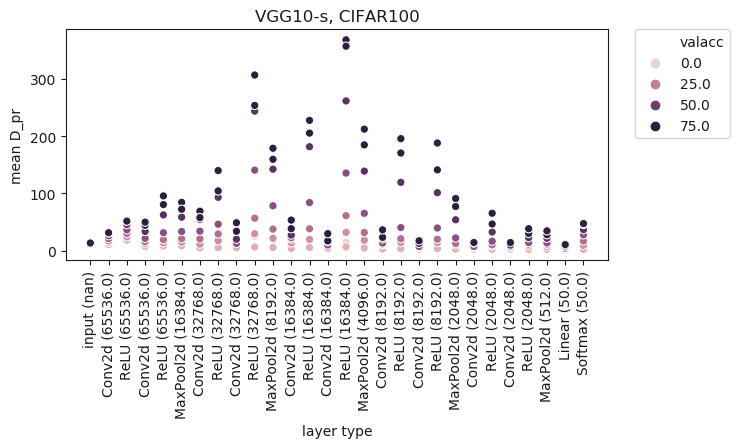

In [685]:
title = 'VGG10-s, CIFAR100'
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr']
mani_dirs = [
    '../dump/exp_transfer2/manifold-seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg10-formatted_features-sort_random/'
]

expand_input(mani_dirs)

tags = [ 
    "ep:" 
]

df = multi_frame_constructor(mani_dirs, tags, measures)

df = add_loss(df, loss_df)

df['tag'] = df['tag']+df['epoch'].astype(str)

opts = {
    'dims':[7,3],
    'sortby': ['layer number','epoch'],
    'hue': 'valacc',
    'fix_legend':True
}

df_filtered = df[(df['imageset']=='train')]

for measure in measures:
    data = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)

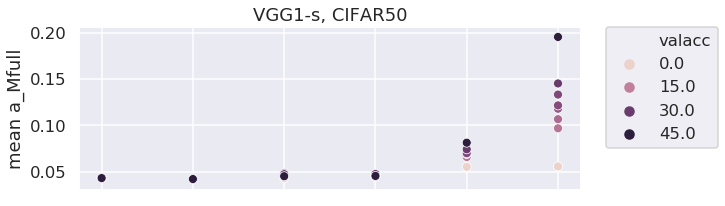

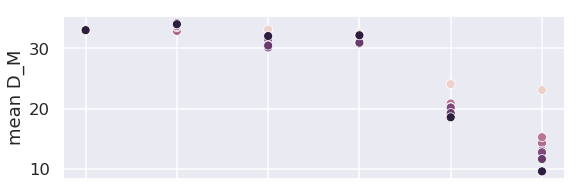

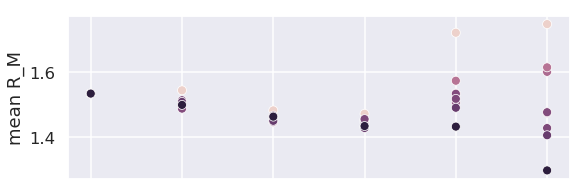

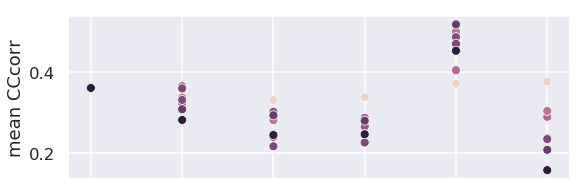

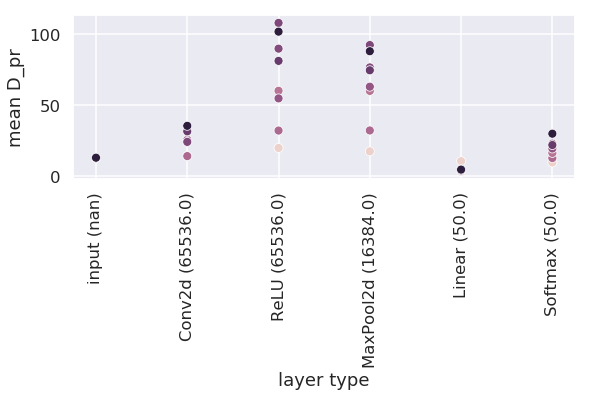

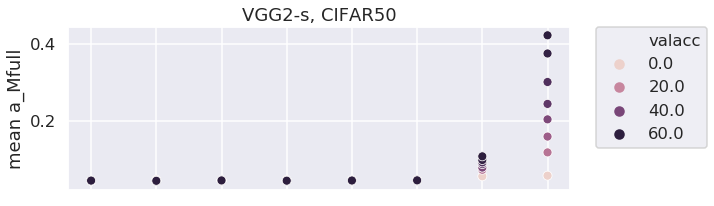

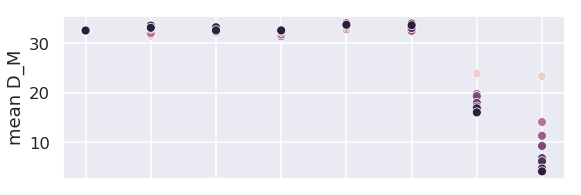

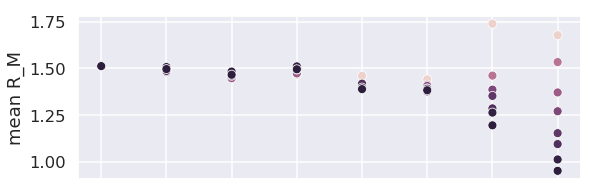

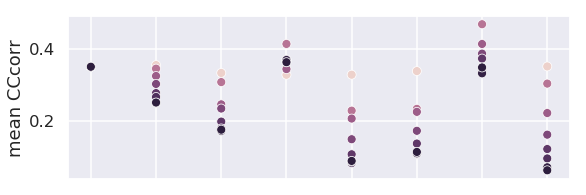

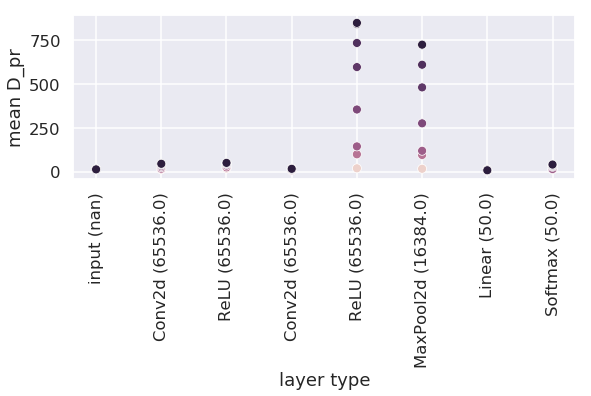

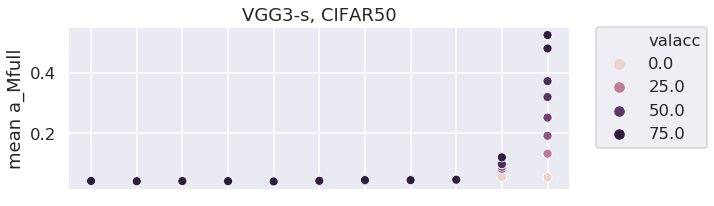

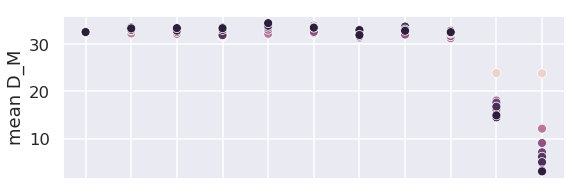

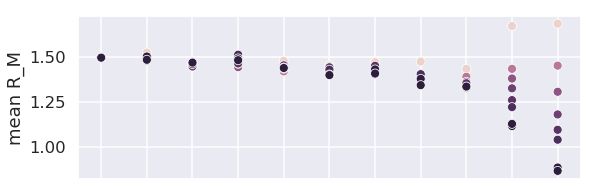

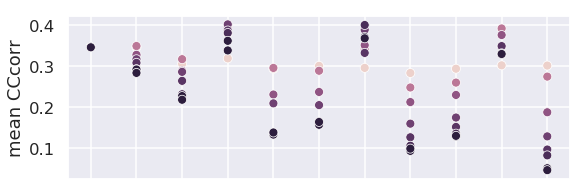

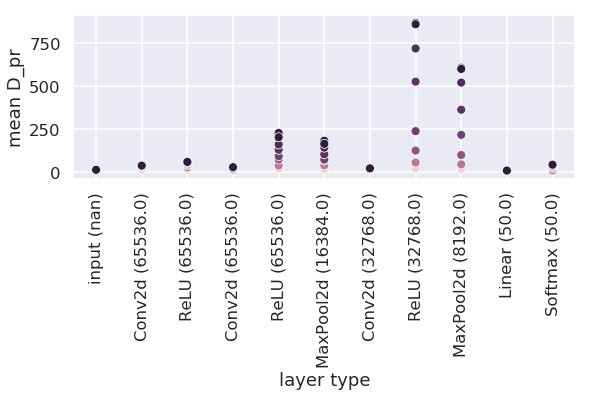

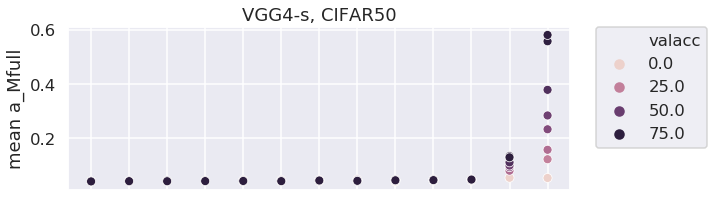

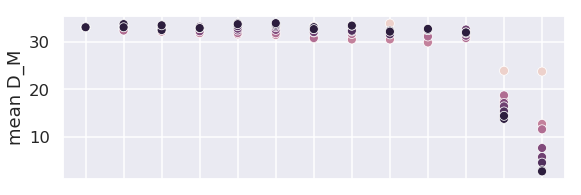

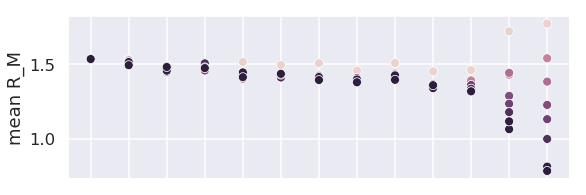

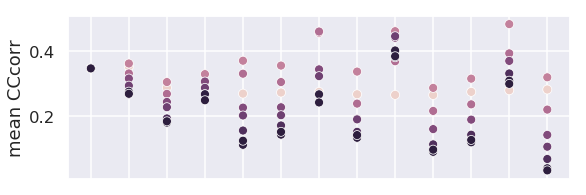

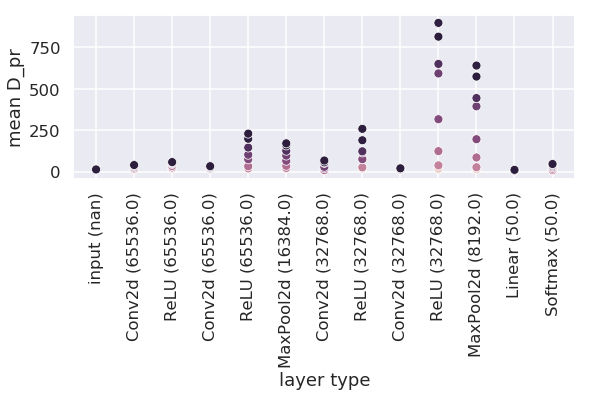

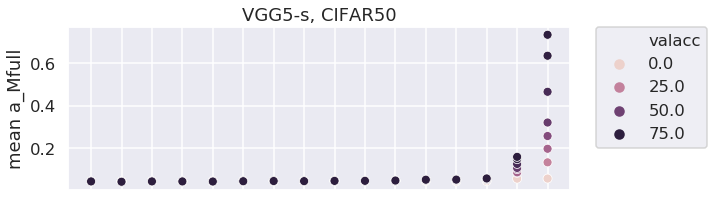

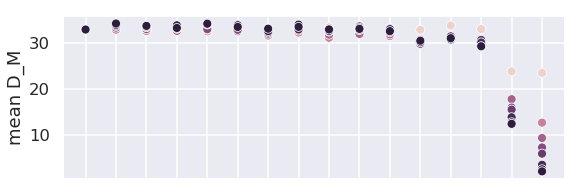

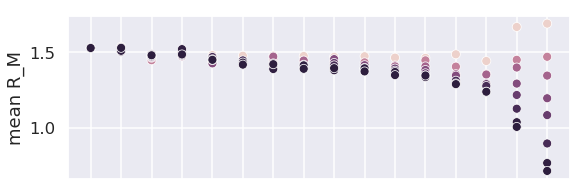

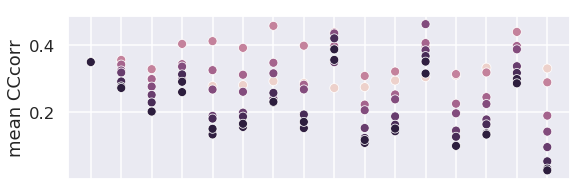

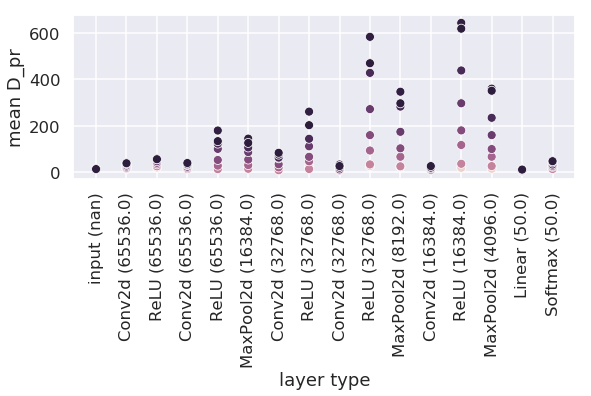

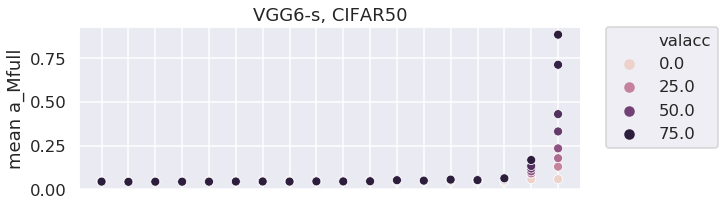

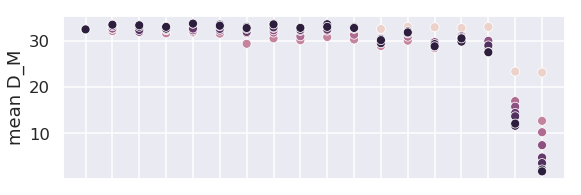

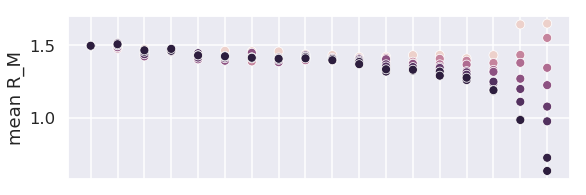

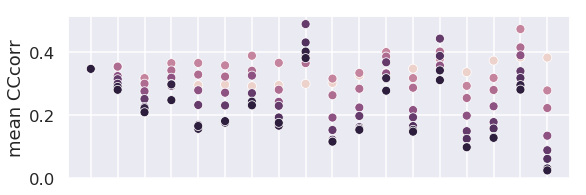

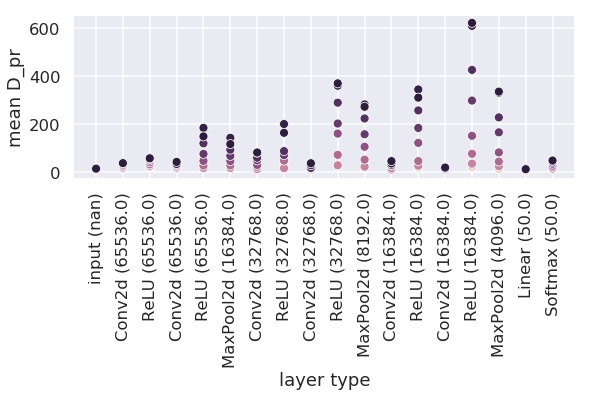

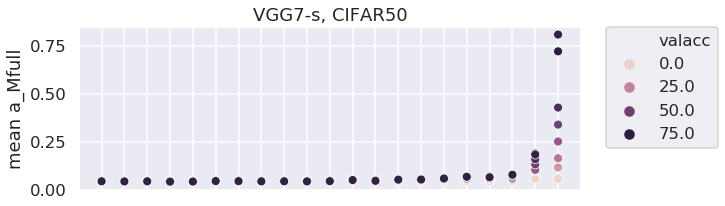

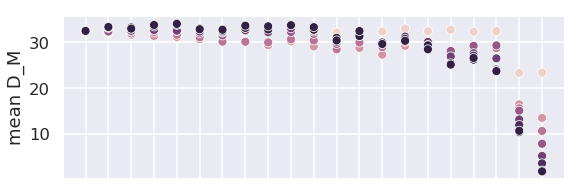

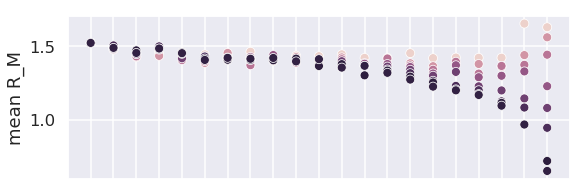

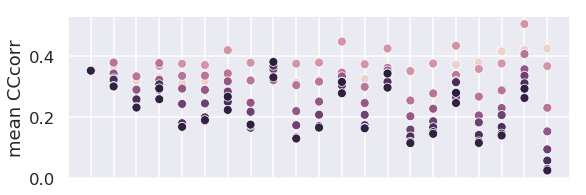

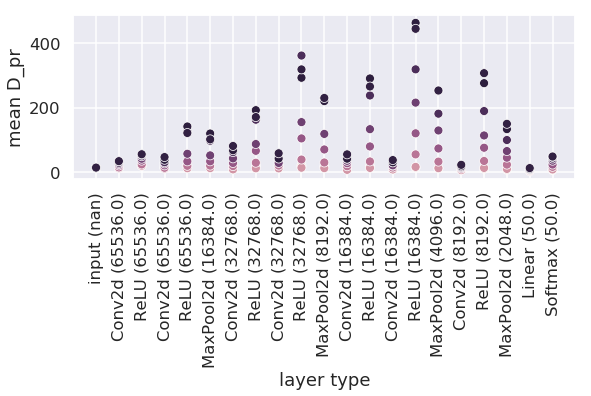

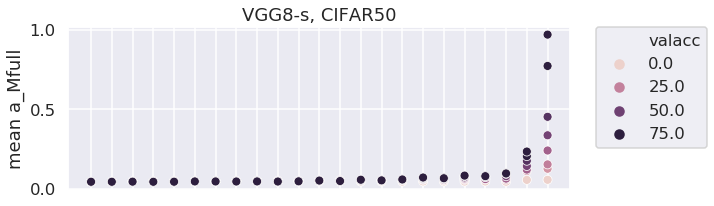

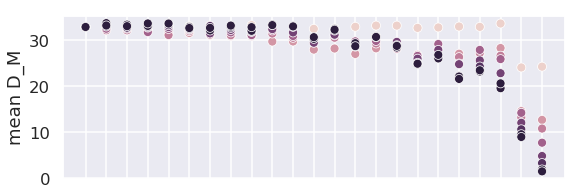

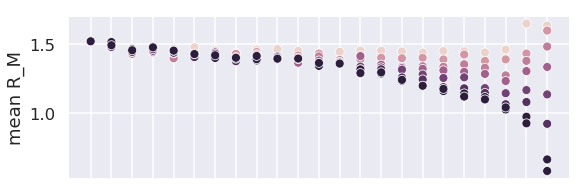

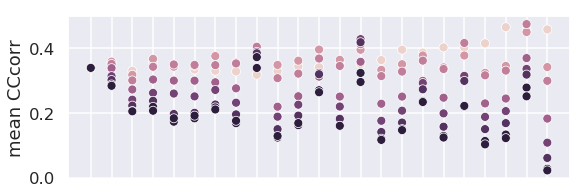

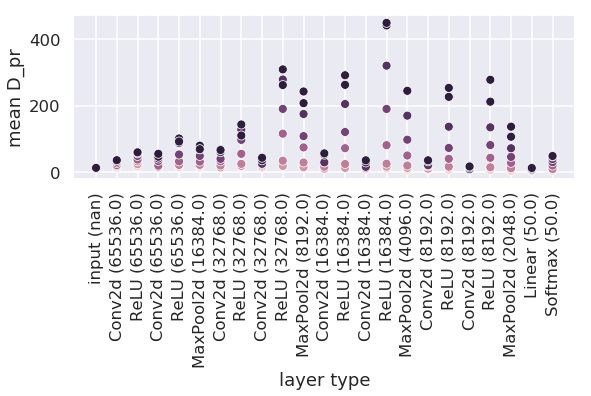

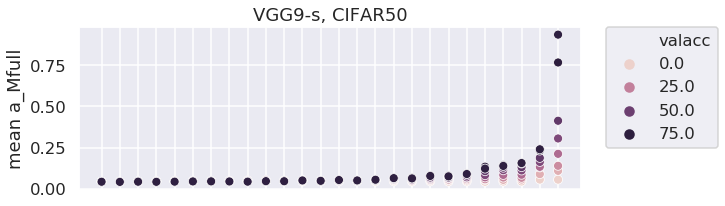

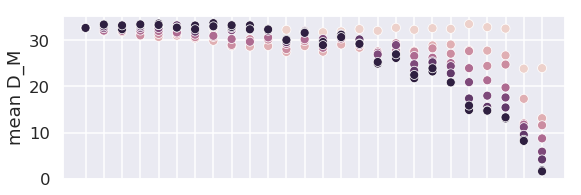

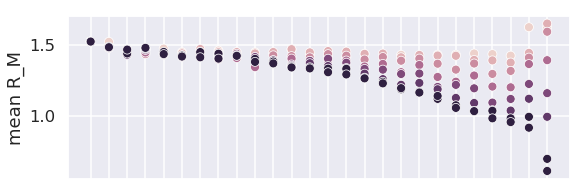

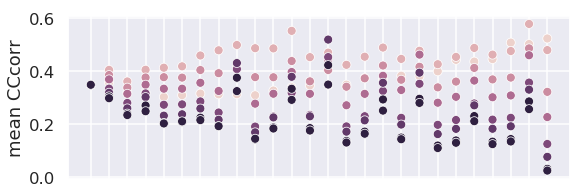

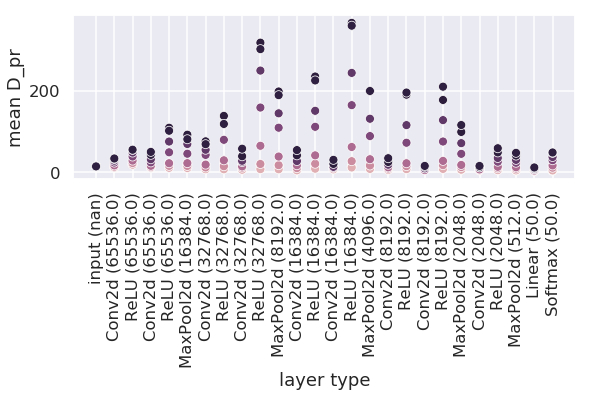

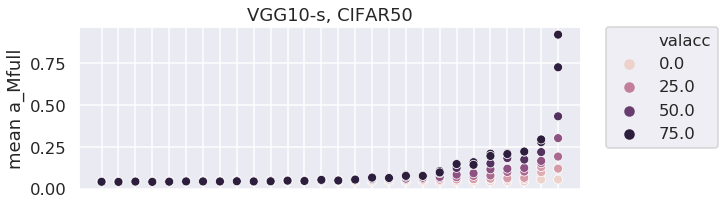

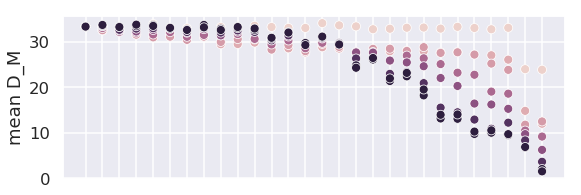

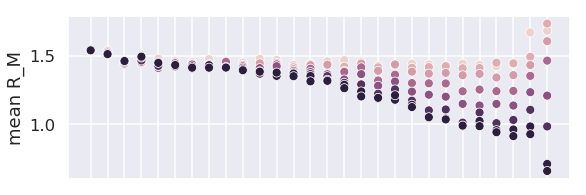

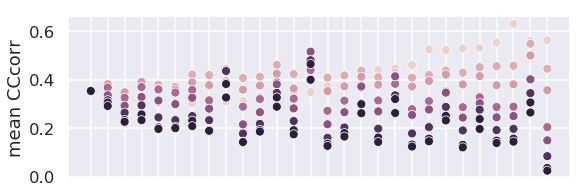

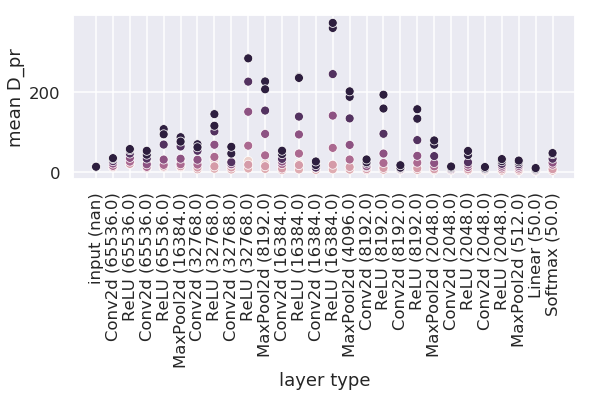

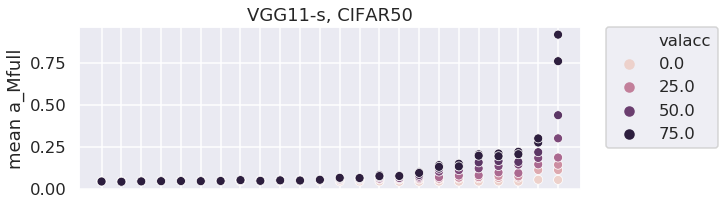

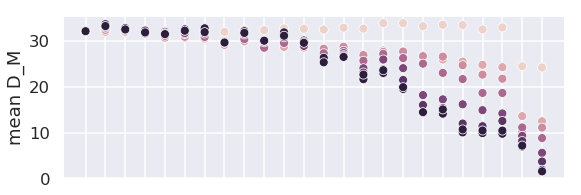

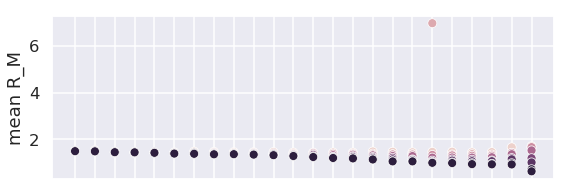

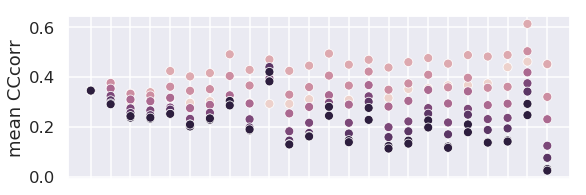

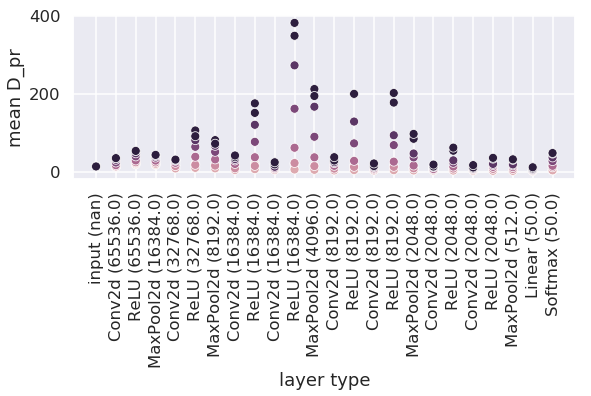

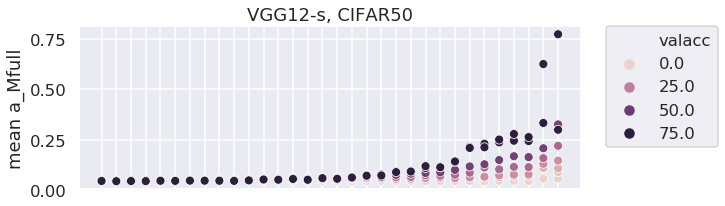

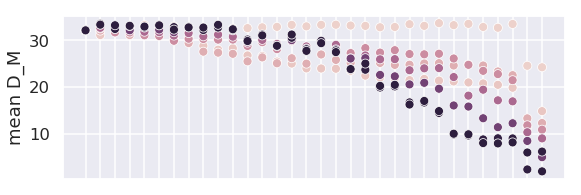

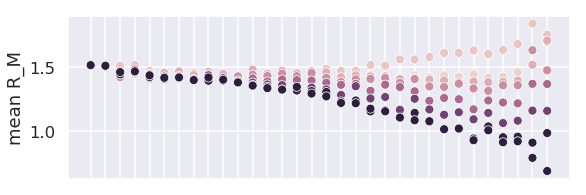

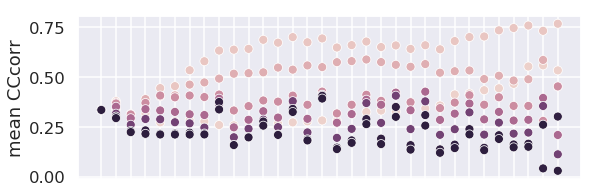

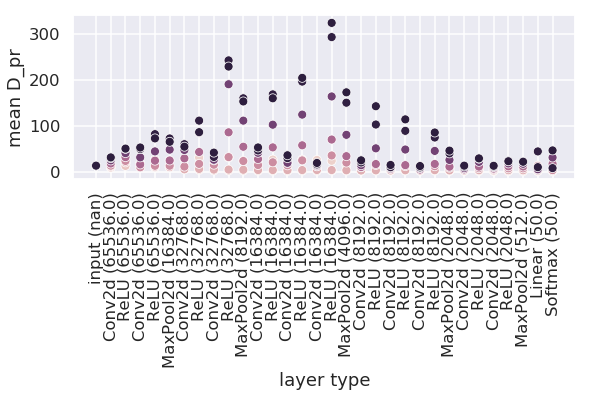

In [492]:
# for i in range(1,13): 
for i in range(1,13): 
    title = 'VGG{}-s, CIFAR50'.format(i)
    measures = ['a_Mfull_vec', 'D_M_vec', 'R_M_vec', 'CCcorr', 'D_pr']
#     measures = ['a_Mfull_vec']

    if i in [4,8,12]:
        mani_dirs = [
            '../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]
    elif i in [11]:
        mani_dirs = [
            '../dump/exp_transfer/manifold-seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]
    else:
        mani_dirs = [
            '../dump/exp_transfer2/manifold-seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]

    expand_input(mani_dirs)

    tags = [ 
        "seed 30 ep:" 
    ]

    df = multi_frame_constructor(mani_dirs, tags, measures)
#     df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
    df = add_loss(df,loss_df)

    df['tag'] = df['tag']+df['epoch'].astype(str)

    opts = {
        'dims':[9,3],
        'sortby': ['layer number','epoch'],
        'hue': 'valacc',
        'fix_legend':True
    }

    df['valacc'] = df['valacc'].round(2)#.astype('str')
    
    df_filtered = df[(df['imageset']=='train')]
#     df_filtered = df[(df['imageset']=='train')&(df['epoch']==8)]

    for j, measure in enumerate(measures):
        data, ax = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)
        if j > 0:
            ax.get_legend().remove()
            ax.set_title('')
        if j != len(measures)-1:
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.set_xlabel('')

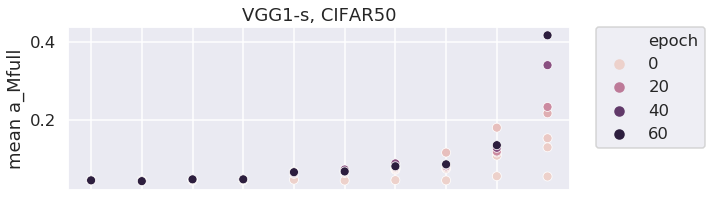

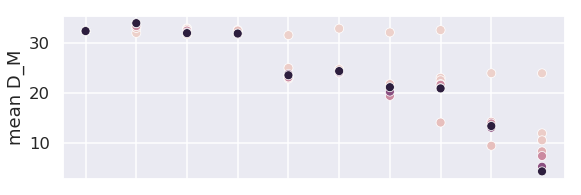

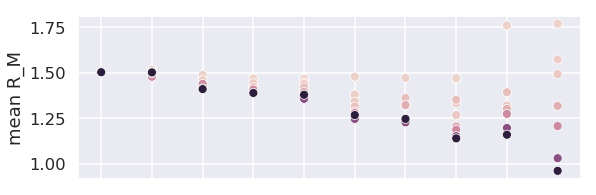

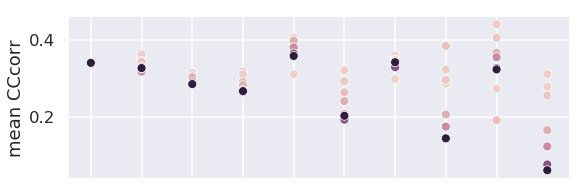

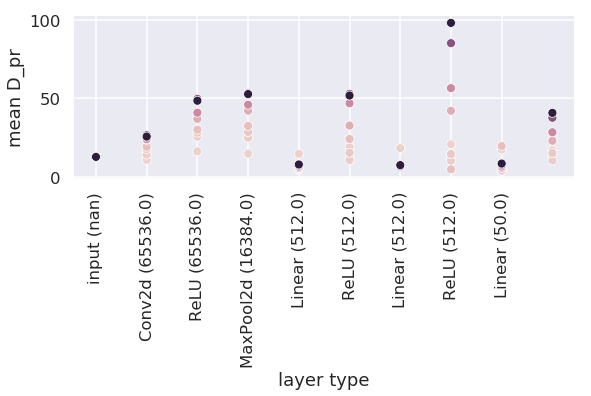

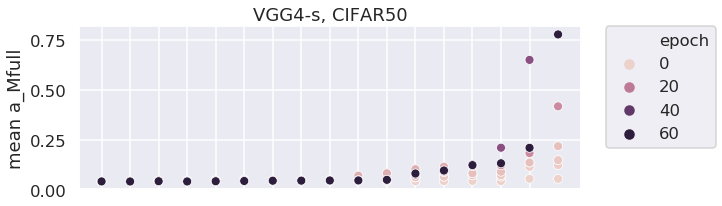

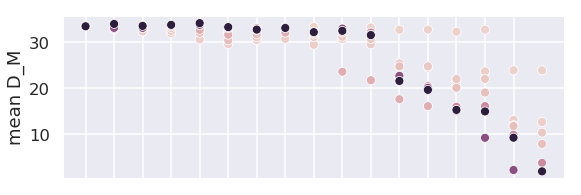

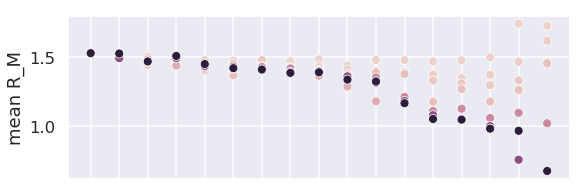

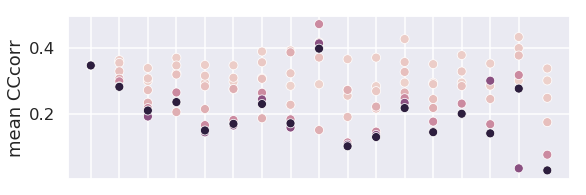

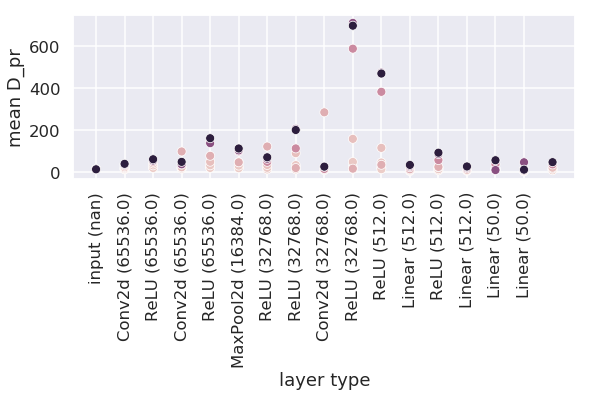

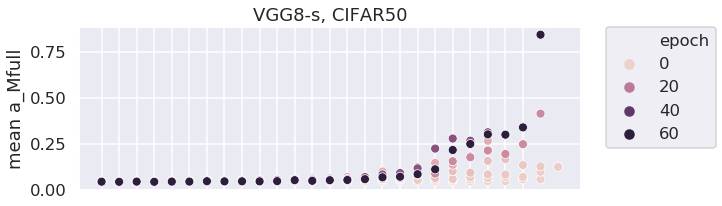

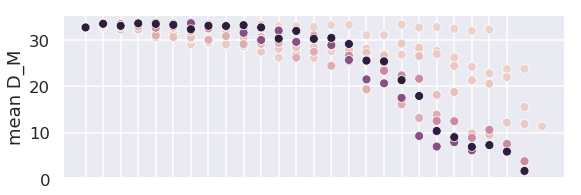

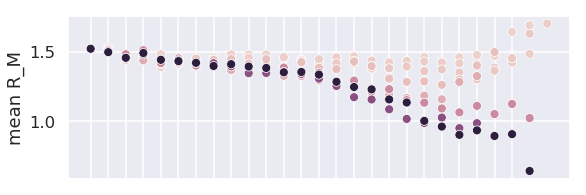

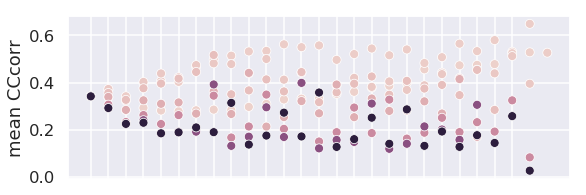

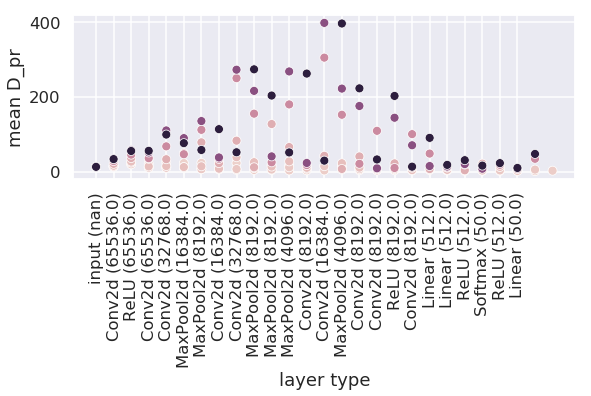

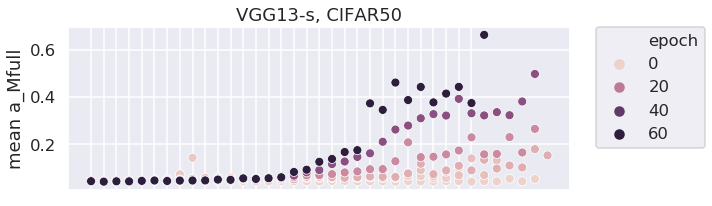

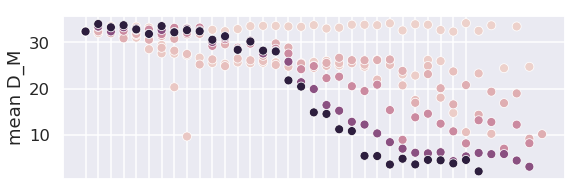

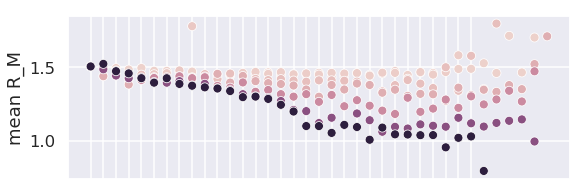

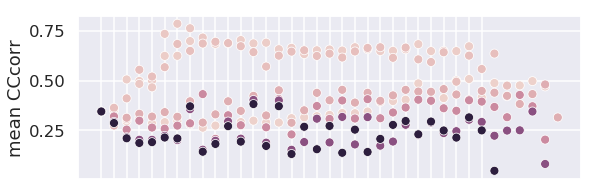

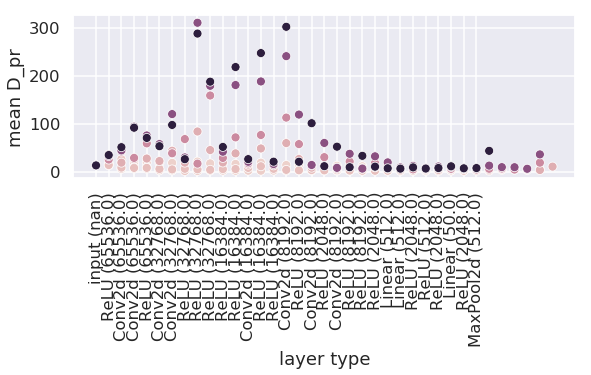

In [502]:
for i in [1,4,8,13]: 
    title = 'VGG{}-s, CIFAR50'.format(i)
    measures = ['a_Mfull_vec', 'D_M_vec', 'R_M_vec', 'CCcorr', 'D_pr']
#     measures = ['a_Mfull_vec']

#     if i in [4,8,12]:
#         mani_dirs = [
#             '../dump/exp_transfer/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
#         ]
#     else:
    mani_dirs = [
        '../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}f-formatted_features-sort_random/'.format(i)
    ]

    expand_input(mani_dirs)

    tags = [ 
        "seed 30 ep:" 
    ]

    df = multi_frame_constructor(mani_dirs, tags, measures)
#     df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
#     df = add_loss(df,loss_df)
#     df['valacc'] = df['valacc'].round(2)#.astype('str')

    df['tag'] = df['tag']+df['epoch'].astype(str)

    opts = {
        'dims':[9,3],
        'sortby': ['layer number','epoch'],
        'hue': 'epoch',
        'fix_legend':True
    }

    
    
    df_filtered = df[(df['imageset']=='train')]
#     df_filtered = df[(df['imageset']=='train')&(df['epoch']==8)]

    for j, measure in enumerate(measures):
        data, ax = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)
        if j > 0:
            ax.get_legend().remove()
            ax.set_title('')
        if j != len(measures)-1:
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.set_xlabel('')

layers that show movement are lower dimensional... wondering if there could be an issue with sampling? if encoding is very sparse you could be missing the representation.

In [414]:
def colapse_conv_relu(delta_df):
    new_delta_df = pd.DataFrame()
    new_delta_df['measure'] = delta_df['measure']

    for i, key in enumerate(delta_df):
        if 'Conv' in key:
            new_delta_df['Conv-Relu_'+str(i+1)] = delta_df[key]+delta_df['ReLU_'+str(i+1)]
        elif 'ReLU' in key:
            pass
        elif 'Linear' in key:
            new_delta_df['Softmax_'+str(i+1)] = delta_df[key]+delta_df['Softmax_'+str(i+1)]
        elif 'Softmax' in key:
            pass
        else:
            new_delta_df[key] = delta_df[key]
            
    return new_delta_df

In [507]:
def delta_plot(delta_df, x, y, name, minmax=True, hline=[-0.5,0.5], vline=[-3,3]):
    xy_df = delta_df[delta_df['measure']==x].melt('measure')
    y_df = delta_df[delta_df['measure']==y].melt('measure')
    xy_df['value2'] = y_df['value'].values
    
    xy_df['type'] = xy_df['variable'].apply(lambda x : x.split('_')[0])
    xy_df['depth'] = xy_df['variable'].apply(lambda x : float(x.split('_')[1])).astype('float')
    xy_df['depth'] = xy_df['variable'].apply(lambda x : float(x.split('_')[1])).astype('float')
    
    sns.reset_defaults()

#     unique_tags = xy_df['variable'].unique()
#     p = sns.cubehelix_palette(len(unique_tags), light=.8, start=.5, rot=-.75)
#     ax = sns.scatterplot(x='value', y='value2', hue='variable', style='type', palette=p, data=xy_df)

    ax = sns.scatterplot(x='value', y='value2', hue='depth', style='type', legend='brief', data=xy_df)   
    
    ax.set_xlabel('delta '+x.replace('_vec',''))
    ax.set_ylabel('delta '+y.replace('_vec',''))
    if minmax:
        ax.hlines(0,xy_df['value'].min()-.01,xy_df['value'].max()+.01)
        ax.set_ylim(xy_df['value'].min()-.01,xy_df['value'].max()+.01)
        ax.vlines(0,xy_df['value2'].min()-.01,xy_df['value2'].max()+.01)
        ax.set_ylim(xy_df['value2'].min()-.01,xy_df['value2'].max()+.01)
    else:
        ax.hlines(0,*hline)
        ax.set_xlim(*hline)
        ax.vlines(0,*vline)
        ax.set_ylim(*vline)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_title('{}, d{} vs d{}'.format(name, x, y)) 
    return xy_df, ax

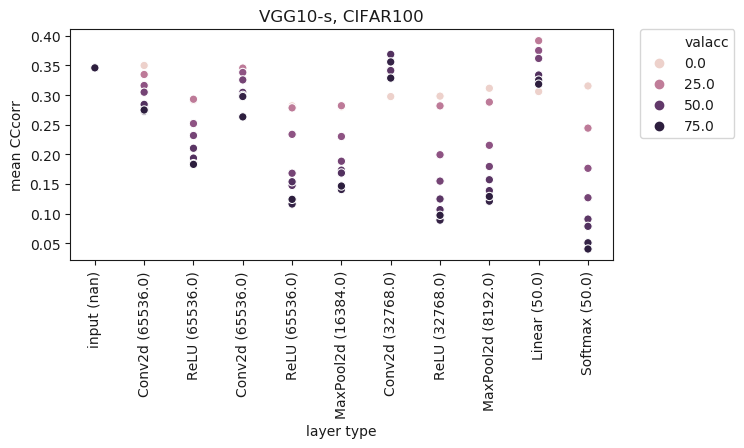

In [689]:
title = 'VGG10-s, CIFAR100'
measures = ['CCcorr']
mani_dirs = [
    '../dump/exp_transfer2/manifold-seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg3-formatted_features-sort_random/'
]

expand_input(mani_dirs)

tags = [ 
    "ep:" 
]

df = multi_frame_constructor(mani_dirs, tags, measures)

df = add_loss(df, loss_df)

df['tag'] = df['tag']+df['epoch'].astype(str)

opts = {
    'dims':[7,3],
    'sortby': ['layer number','epoch'],
    'hue': 'valacc',
    'fix_legend':True
}

df_filtered = df[(df['imageset']=='train')]

for measure in measures:
    data = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)

In [789]:
print(delta_df.shape)
delta_df

(24, 7)


measure  Conv-Relu_2  Conv-Relu_4  MaxPool2d_5  Conv-Relu_7  \
0      D_M_vec     0.624627     0.671147    -0.561024    -0.325672   
1      R_M_vec   -0.0300119   -0.0370601   -0.0386519   -0.0234616   
2      a_M_vec -0.000382922  2.20429e-05   0.00162002  0.000999327   
3       CCcorr    -0.160312   -0.0475027    0.0255155   -0.0571516   
4         D_pr      39.4929       232.84     -56.0196      617.627   
5  Rm*sqrt(Dm)   -0.0913226    -0.130617    -0.292723    -0.174355   
0      D_M_vec     0.830052      1.05274    -0.950468    -0.667605   
1      R_M_vec   -0.0274857    -0.030053    -0.039604   -0.0561554   
2      a_M_vec -0.000479014 -0.000934444   0.00189097    0.0026183   
3       CCcorr    -0.127965   -0.0798603    0.0256307   -0.0650199   
4         D_pr      46.0184      143.617     -38.2966      695.797   
5  Rm*sqrt(Dm)   -0.0506909   -0.0436315    -0.346511    -0.402836   
0      D_M_vec     0.883167     0.615939    -0.577232    0.0107502   
1      R_M_vec   -0.0546189   -0.0398848   -0.0224164    -0.025735   
2      a_M_vec -0.000304229 -0.000262718    0.0013822  0.000411456   
3       CCcorr    -0.147072   -0.0490117     0.015613   -0.0731161   
4         D_pr       41.753      128.935      -16.357      659.146   
5  Rm*sqrt(Dm)    -0.195804    -0.152822    -0.199929    -0.146463   
0      D_M_vec    -0.457472     0.730801    0.0834216    -0.589578   
1      R_M_vec   -0.0832605   -0.0378531   -0.0184798   -0.0523489   
2      a_M_vec   0.00156202  -0.00047699  0.000184991   0.00241322   
3       CCcorr    -0.149673   -0.0621008    0.0244633   -0.0641989   
4         D_pr      38.0833      262.658     -79.6785      633.448   
5  Rm*sqrt(Dm)    -0.538527    -0.126478   -0.0969237    -0.372747   

   MaxPool2d_8 Softmax_10  
0    -0.271039   -29.7555  
1    -0.018724  -0.536975  
2   0.00111224   0.553145  
3    0.0312137 -0.0861975  
4     -258.398   -544.543  
5    -0.139649   -6.33568  
0    -0.286308   -29.4572  
1  -0.00776359  -0.469977  
2  0.000795463   0.528242  
3    0.0312031 -0.0836853  
4     -260.225   -557.041  
5   -0.0779129   -6.09709  
0    -0.778565   -29.2447  
1   -0.0407739  -0.528186  
2   0.00229467   0.540898  
3    0.0347506 -0.0916368  
4      -243.97   -537.891  
5    -0.325121   -6.18606  
0    -0.628322   -29.3127  
1   -0.0054901  -0.517702  
2  0.000846453    0.53238  
3    0.0313893 -0.0863509  
4     -263.334   -560.355  
5    -0.105621   -6.21462

('success for seeds:', [0, 1, 3, 4])


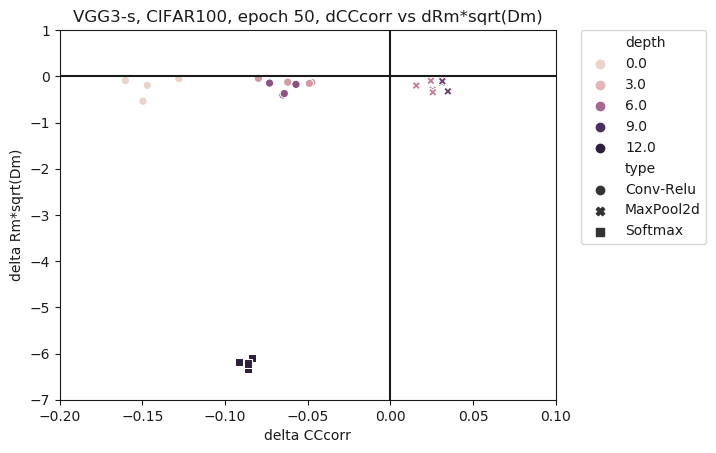

In [779]:
i = 3

title = 'VGG{}-s, CIFAR100'.format(i)
hline=[-.2,.1]
vlines = [[-7,1],[-7,3],[-1.3,1.3]]

disp_measures = ['Rm*sqrt(Dm)']

dir_template = '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format('{}', i)
measures = ['D_M_vec','R_M_vec', 'a_M_vec', 'CCcorr', 'D_pr']
delta_df = get_delta_frame(dir_template, 50, seeds=[0,5], expand_input_files=True, measures=measures, skip=[2], exclude=['-ep_0-','-ep_1-'], verbose=False)

delta_df = colapse_conv_relu(delta_df)

for x, vline in zip(disp_measures,vlines):
    y = 'CCcorr'
    xy_df, ax = delta_plot(delta_df,y,x, title+', epoch 50', minmax=False, hline=hline, vline=vline)
    plt.show()

('try seed:', 0)
success
('try seed:', 1)
success
('try seed:', 3)
success
('try seed:', 4)
success
('success for seeds:', [0, 1, 3, 4])


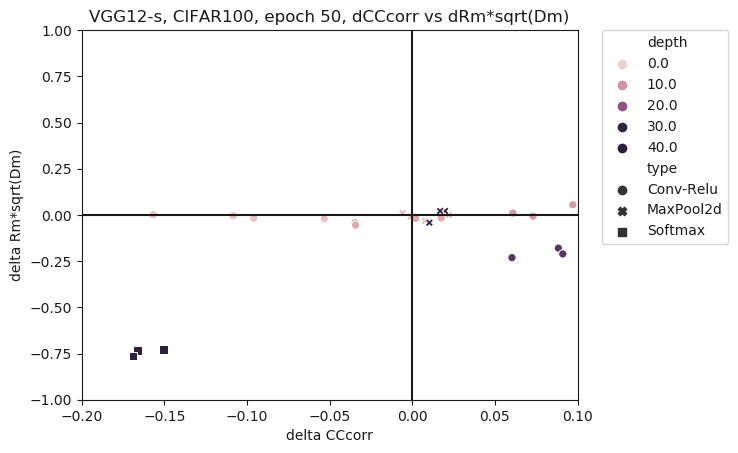

In [682]:
i = 12

title = 'VGG{}-s, CIFAR100'.format(i)
hline=[-.2,.1]
vlines = [[-1,1],[-7,3],[-1.3,1.3]]

disp_measures = ['Rm*sqrt(Dm)']

dir_template = '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format('{}', i)
measures = ['D_M_vec','R_M_vec', 'a_M_vec', 'CCcorr', 'D_pr']
delta_df = get_delta_frame(dir_template, 50, seeds=[0,5], normalized=True, expand_input_files=True, measures=measures, skip=[2], exclude=['-ep_0-','-ep_1-'], verbose=True)

delta_df = colapse_conv_relu(delta_df)

for x, vline in zip(disp_measures,vlines):
    y = 'CCcorr'
    xy_df, ax = delta_plot(delta_df,y,x, title+', epoch 50', minmax=False, hline=hline, vline=vline)
    plt.show()

('success for seeds:', [0, 1, 2, 3, 4])


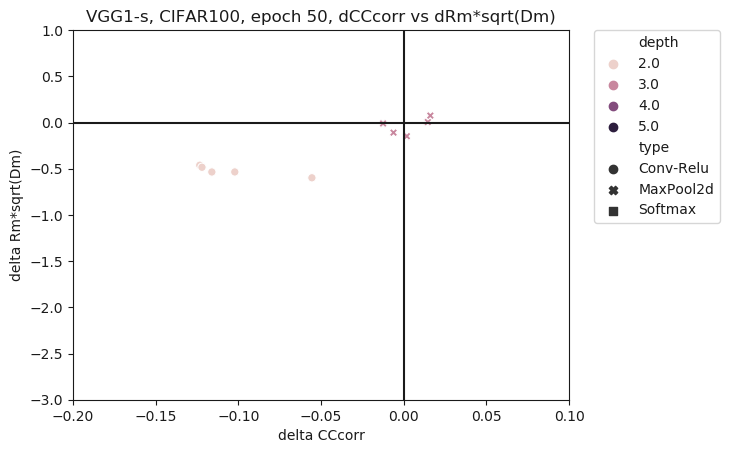

('success for seeds:', [0, 1, 2, 3, 4])


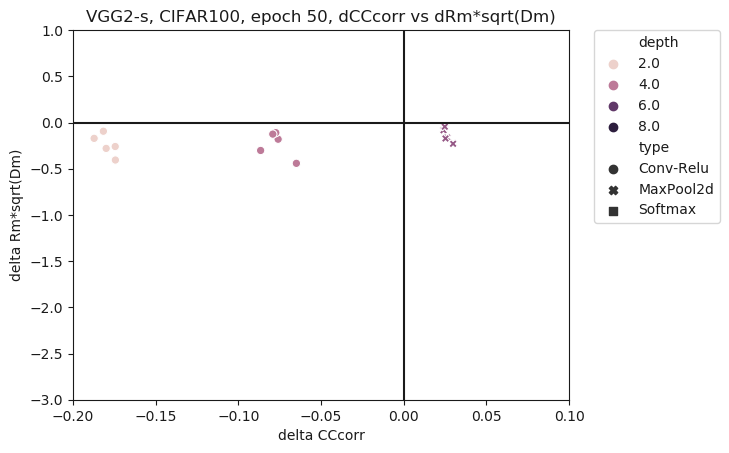

('success for seeds:', [0, 1, 2, 3, 4])


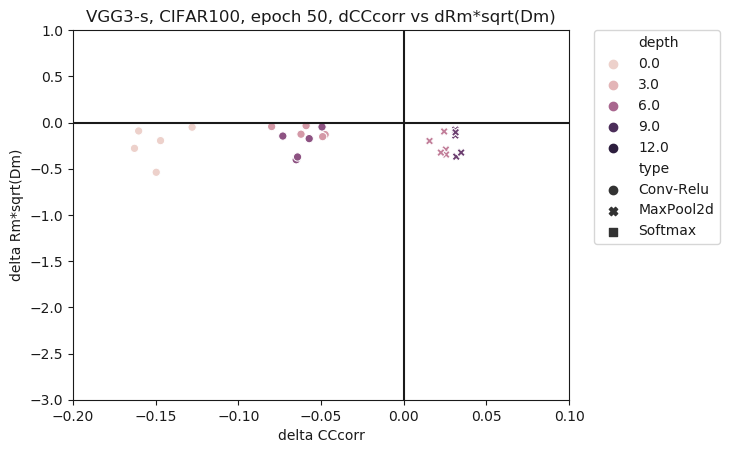

ValueError: operands could not be broadcast together with shapes (6,) (0,) 

In [510]:
for i in range(1,11):
    if i in [4,5,6,8]:
        pass
    else:
        title = 'VGG{}-s, CIFAR100'.format(i)
        hline=[-.2,.1]
        vlines = [[-3,1],[-10,3],[-1.3,1.3]]

        disp_measures = ['Rm*sqrt(Dm)']

        dir_template = '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format('{}', i)
        measures = ['D_M_vec','R_M_vec', 'a_M_vec', 'CCcorr', 'D_pr']
        delta_df = get_delta_frame(dir_template, 50, seeds=[0,5], expand_input_files=True, measures=measures, skip=[], exclude=['-ep_0-','-ep_1-'], verbose=False)

        delta_df = colapse_conv_relu(delta_df)

        for x, vline in zip(disp_measures,vlines):
            y = 'CCcorr'
            xy_df, ax = delta_plot(delta_df,y,x, title+', epoch 50', minmax=False, hline=hline, vline=vline)
            plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

In [724]:
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr']
mani_dirs = [
    '../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg10-formatted_features-sort_random/'.format(i)
]

tags = [ 
    "seed 30 ep:" 
]

df = multi_frame_constructor(mani_dirs, tags, measures)
# df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
df = df[(df['type']!='Conv2d')&(df['type']!='Linear')]
df = add_loss(df, loss_df)
df = df.sort_values('layer number')

In [725]:
def get_xyz(df, measures, epoch):
    x = df[(df['measure']==measures[0])&(df['epoch']==epoch)]['value'].values
    a = df[(df['measure']==measures[0])&(df['epoch']==epoch)]['path'].values
    y = df[(df['measure']==measures[1])&(df['epoch']==epoch)]['value'].values
    b = df[(df['measure']==measures[1])&(df['epoch']==epoch)]['path'].values
    z = df[(df['measure']==measures[2])&(df['epoch']==epoch)]['value'].values
    c = df[(df['measure']==measures[2])&(df['epoch']==epoch)]['path'].values
    print(x.shape,y.shape,z.shape)
    check_path(a,b,c)
    
    return x,y,z

def check_path(a,b,c):
    for i in range(len(a)):
        if (a[i]==b[i])&(a[i]==c[i]):
            pass
        else:
            print(a[i],b[i],c[i])
        
x1,y1,z1 = get_xyz(df, ['CCcorr', 'a_Mfull_vec', 'D_pr'], 0)
x2,y2,z2 = get_xyz(df, ['CCcorr', 'a_Mfull_vec', 'D_pr'], 1)
x3,y3,z3 = get_xyz(df, ['CCcorr', 'a_Mfull_vec', 'D_pr'], 50)

((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))


In [726]:
def get_ltype(df, measures, ltype):
    x = df[(df['measure']==measures[0])&(df['type']==ltype)]['value'].values
    a = df[(df['measure']==measures[0])&(df['type']==ltype)]['path'].values
    y = df[(df['measure']==measures[1])&(df['type']==ltype)]['value'].values
    b = df[(df['measure']==measures[1])&(df['type']==ltype)]['path'].values
    z = df[(df['measure']==measures[2])&(df['type']==ltype)]['value'].values
    c = df[(df['measure']==measures[2])&(df['type']==ltype)]['path'].values
    print(x.shape,y.shape,z.shape)
#     check_path(a,b,c)
    
    return x,y,z

ltypes = ['input', 'ReLU', 'MaxPool2d', 'Softmax']
x1,y1,z1 = get_ltype(df, measures, 'ReLU')

((80,), (80,), (80,))


In [727]:
valaccs = df['valacc'].unique()
epochs = df['epoch'].unique()

sort = epochs.argsort()
epochs = epochs[sort]
valaccs = valaccs[sort]
epochs, valaccs

(array([ 0,  1,  2,  4,  8, 16, 32, 50]),
 array([ 1.  , 13.3 , 20.54, 30.64, 40.94, 54.98, 64.56, 65.58]))

In [738]:
layers = x = df[(df['measure']==measures[0])&(df['epoch']==epoch)]['type'].values
markers = []
for layer in layers:
    if 'input' in layer:
        markers.append('square')
    elif 'ReLU' in layer:
        markers.append('circle')
    elif 'MaxPool2d' in layer:
        markers.append('diamond')
    elif 'Softmax' in layer:
        markers.append('cross')
        
markers

['square',
 'circle',
 'circle',
 'diamond',
 'circle',
 'circle',
 'diamond',
 'circle',
 'circle',
 'diamond',
 'circle',
 'circle',
 'diamond',
 'circle',
 'circle',
 'diamond',
 'cross']

In [743]:
traces = []
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr']
for i, epoch in enumerate(epochs):
    x,y,z = get_xyz(df, measures, epoch)
    
    traces.append(go.Scatter3d(
        name = 'epoch: {}, val acc: {}'.format(epoch, valaccs[i]),
        x=x,
        y=y,
        z=z,
        mode = 'lines',
#         mode = 'lines+markers',
#         marker = {
#             'color':'black',
#             'symbol':markers,
#             'size':4,
#             'opacity':0.5
#         },
        line=dict(
            color='rgba({}, 130, 130, .9)'.format(130+valaccs[i]),
            width=8
#             opacity=.5
        )
    ))

# ltypes = ['input', 'ReLU', 'MaxPool2d', 'Softmax']
# symbols = ['circle', 'cross', 'square', 'diamond']

# for i, ltype in enumerate(ltypes):
#     x,y,z = get_xyz(df, measures, ltype)
    
#     traces.append(go.Scatter3d(
#         name = 'layer type: {}'.format(ltype),
#         x=x,
#         y=y,
#         z=z,
#         mode = 'markers',
#         marker = dict(
#             color='rgba({}, 160, 160, .9)'.format(160+valaccs[i]),
#             symbol=symbols[i],
#             size=12,
#             opacity=.5
#         )
#     ))

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'Center Correlation'
        ),
        yaxis = dict(
            title= 'Capacity'
        ),
        zaxis = dict(
            title= 'Participation Ratio'
        )
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dapello/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


In [778]:
data = []
traces = []
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr']
for i, epoch in enumerate(epochs):
    x,y,z = get_xyz(df, measures, epoch)
    data.append([x,y,z])
    traces.append(go.Scatter3d(
        name = 'epoch: {}, val acc: {}'.format(epoch, valaccs[i]),
        x=x,
        y=y,
        z=z,
#         mode = 'lines',
        mode = 'lines+markers',
        marker = {
            'color':'rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            'symbol':'circle',
            'size':2,
            'opacity':0.5
        },
        line=dict(
            color='rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            width=5
#             opacity=.5
        )
    ))

data = np.array(data)

traces.append(go.Scatter3d(
    name = 'Pixels',
    x=data[:,0,0],
    y=data[:,1,0],
    z=data[:,2,0],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='circle-open',
        size=4,
        line=dict(
            width=6
        ),
        opacity=1
    )
))

traces.append(go.Scatter3d(
    name = 'Softmax',
    x=data[:,0,-1],
    y=data[:,1,-1],
    z=data[:,2,-1],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='diamond',
        size=5,
        opacity=.8
    )
))

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'Center Correlation'
        ),
        yaxis = dict(
            title= 'Capacity'
        ),
        zaxis = dict(
            title= 'Participation Ratio'
        )
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='phase-space-with-layer-types')

((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))


In [760]:
data = np.array(data)

In [751]:
data.shape

(8, 3, 17)

In [761]:
data[:,0,0]

array([0.33702446, 0.33702446, 0.33702446, 0.33702446, 0.33702446,
       0.33702446, 0.33702446, 0.33702446])

In [753]:
data[:,:,-1]

array([[5.17744196e-01, 5.59396209e-02, 2.80313392e+00],
       [4.00887297e-01, 1.16431570e-01, 6.20160897e+00],
       [3.34315707e-01, 1.37776305e-01, 9.42006353e+00],
       [2.20555556e-01, 2.01845697e-01, 1.92093953e+01],
       [1.34159264e-01, 2.89693170e-01, 2.59745011e+01],
       [7.48112799e-02, 4.17118841e-01, 3.72260471e+01],
       [3.30316742e-02, 7.15036052e-01, 4.62469776e+01],
       [2.46670313e-02, 8.65430654e-01, 4.80806112e+01]])

In [756]:
np.array([x,y,z]).T

array([[2.46670313e-02, 1.16431570e-01, 2.80313392e+00],
       [5.17744196e-01, 1.37776305e-01, 6.20160897e+00],
       [2.20555556e-01, 8.65430654e-01, 3.72260471e+01],
       [3.30316742e-02, 2.01845697e-01, 9.42006353e+00],
       [1.34159264e-01, 5.59396209e-02, 4.62469776e+01],
       [3.34315707e-01, 7.15036052e-01, 4.80806112e+01],
       [4.00887297e-01, 4.17118841e-01, 1.92093953e+01],
       [7.48112799e-02, 2.89693170e-01, 2.59745011e+01]])